In [1]:
# download dependencies
# numpy will be downloaded as a dependency
!pip install tensorflow==2.3.1
!pip install matplotlib==3.3.3

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# load data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# we use validation split when fitting so validation set doesn't exist

# each single row shape should be (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(f"Training set shape: {x_train.shape}, {y_train.shape}")
print(f"Test set shape: {x_test.shape}, {y_test.shape}")

Training set shape: (60000, 28, 28, 1), (60000,)
Test set shape: (10000, 28, 28, 1), (10000,)


In [4]:
# normalize input data
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

In [5]:
# one-hot encoding target
NUM_CLASSES = 10
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [6]:
INPUT_SHAPE = x_train.shape[1:]
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 30

# build model
model = keras.Sequential([
        keras.Input(shape=INPUT_SHAPE),
        layers.Conv2D(96, kernel_size=(3, 3), kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu", kernel_initializer='he_normal'),
        layers.Dropout(0.5),
        layers.Dense(NUM_CLASSES, activation="softmax")])

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.003),
              metrics=["accuracy"])
# EarlyStopping using validation split
history = model.fit(x_train, y_train,
          batch_size=BATCH_SIZE, epochs=EPOCHS,
          validation_split=VALIDATION_SPLIT,
          callbacks=EarlyStopping(monitor='val_loss', patience=5))

Epoch 1/30
375/375 [==============================] - 101s 269ms/step - loss: 0.6346 - accuracy: 0.7959 - val_loss: 0.1177 - val_accuracy: 0.9649
Epoch 2/30
375/375 [==============================] - 88s 236ms/step - loss: 0.3135 - accuracy: 0.8915 - val_loss: 0.0651 - val_accuracy: 0.9819
Epoch 3/30
375/375 [==============================] - 79s 211ms/step - loss: 0.2485 - accuracy: 0.9101 - val_loss: 0.0535 - val_accuracy: 0.9850
Epoch 4/30
375/375 [==============================] - 79s 211ms/step - loss: 0.2201 - accuracy: 0.9187 - val_loss: 0.0487 - val_accuracy: 0.9857
Epoch 5/30
375/375 [==============================] - 79s 211ms/step - loss: 0.1999 - accuracy: 0.9260 - val_loss: 0.0447 - val_accuracy: 0.9870
Epoch 6/30
375/375 [==============================] - 76s 203ms/step - loss: 0.1836 - accuracy: 0.9300 - val_loss: 0.0425 - val_accuracy: 0.9883
Epoch 7/30
375/375 [==============================] - 74s 198ms/step - loss: 0.1738 - accuracy: 0.9346 - val_loss: 0.0410 - val_a

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Set - Loss: {test_loss:.6f}, Accuracy: {test_acc * 100:.2f}%")

Test Set - Loss: 0.036314, Accuracy: 99.11%


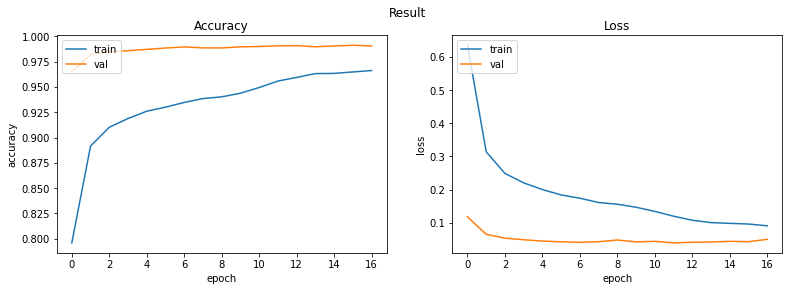

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,4))
fig.suptitle('Result')

# Accuracy history
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')

# Loss history
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')

In [9]:
# save model to "model" directory
model.save("model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model/assets
